[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM-examples.git/main?urlpath=lab/tree/PySDM_examples/Alpert_and_Knopf_2016/fig_5.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM-examples/blob/main/PySDM_examples/Alpert_and_Knopf_2016/fig_5.ipynb)

#### based on Fig. 5 from Alpert and Knopf 2016 (Atmos. Chem. Phys. 16) "_Analysis of isothermal and cooling-rate-dependent immersion freezing by a unifying stochastic ice nucleation model_"
https://doi.org/10.5194/acp-16-2083-2016

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples>=1.14', 'PySDM>=1.14')

In [2]:
from open_atmos_jupyter_utils import show_plot
from PySDM_examples.Alpert_and_Knopf_2016 import Simulation, Table2
from matplotlib import pylab
from PySDM.physics import si

In [3]:
cases = Table2()

In [4]:
sim = Simulation(cases=cases, time_step=10*si.s, heterogeneous_ice_nucleation_rate='ABIFM',
                 temperature_range=(259*si.K, 266*si.K))

In [5]:
sim.run(('CrHE1', 'CrHE2'))

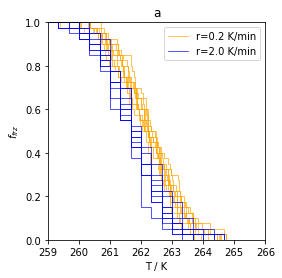

HTML(value="<a href='./tmphj9hjjtz.pdf' target='_blank'>./tmphj9hjjtz.pdf</a><br>")

In [6]:
sim.plot(ylim=(0, 1))
pylab.title("a")
show_plot('fig_5a.pdf')

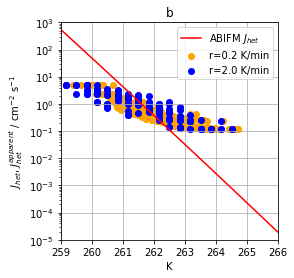

HTML(value="<a href='./tmpbbvv6iww.pdf' target='_blank'>./tmpbbvv6iww.pdf</a><br>")

In [7]:
sim.plot_j_het(variant='apparent', ylim=(1e-5, 1e3), abifm_params_case='CrHE1')
pylab.title("b")
show_plot('fig_5b.pdf')

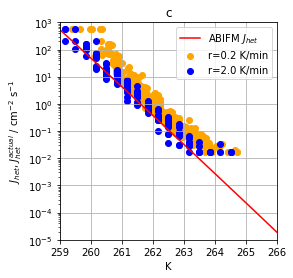

HTML(value="<a href='./tmpakif51vy.pdf' target='_blank'>./tmpakif51vy.pdf</a><br>")

In [8]:
sim.plot_j_het(variant='actual', ylim=(1e-5, 1e3), abifm_params_case='CrHE1')
pylab.title("c")
show_plot('fig_5c.pdf')